In [17]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
import pigleg_cv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
!pwd

/webapps/piglegsurgery/piglegcv


In [19]:
import torch
torch.cuda.is_available()

True

In [20]:
!nvidia-smi

Tue Jun 27 14:47:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:42:00.0 Off |                  N/A |
|  0%   52C    P8    16W / 250W |   1951MiB / 11175MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [21]:
torch.__version__

'1.12.0a0+8a1a93a'

In [22]:
Path("/root/.cache/torch/hub/checkpoints/").exists()

True

In [23]:
!ls /root/.cache/torch/hub/checkpoints/

yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth


# Run incision crop

In [24]:
# find the video
img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob("*/*.mp4"))
img_pths[0]

PosixPath('../piglegsurgeryweb/media/upload/20211013-105011_Einzelknopfnaht_384c92ad62ff4726f289cea500892c68eff91628/Einzelknopfnaht.mp4')

4021
Last frame capture error, frame 4021


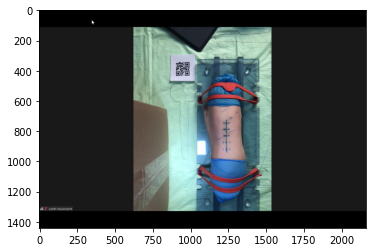

In [25]:
# get the frame
img,_ = pigleg_cv.get_frame_to_process(img_pths[0])
# opencv has inverted color channels
plt.imshow(img[:,:,::-1])


2023-06-27 14:47:23,706 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - checkpoint_path.exists=True
2023-06-27 14:47:23,712 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - img.shape=(1440, 2160, 3), max(img)=255


load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


/home/appuser/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2023-06-27 14:47:24,705 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-06-27 14:47:24.706 | DEBUG    | tools:save_json:9 - Writing 'delete/meta.json'
2023-06-27 14:47:24.707 | DEBUG    | tools:save_json:18 - old keys: ['pixelsize_m_by_incision_size']
2023-06-27 14:47:24.708 | DEBUG    | tools:save_json:20 - updated keys: ['pixelsize_m_by_incision_size']


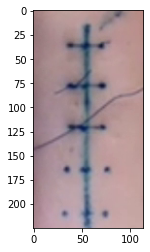

In [26]:
# find the incision
imgs = pigleg_cv.run_incision_detection(img, "./delete/")
plt.imshow(imgs[0][:,:,::-1])

In [27]:
# pip install mmcv-full

# Run whole video processing

In [28]:
img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob("*/test*.mp4"))
img_pths[0]

PosixPath('../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4')

2023-06-27 14:47:25.001 | DEBUG    | pigleg_cv:do_computer_vision:40 - CV processing started on ../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4, outputdir=./del_test_video_output/
2023-06-27 14:47:25.002 | DEBUG    | pigleg_cv:run_video_processing2:97 - Running video processing...
2023-06-27 14:47:25.003 | DEBUG    | run_qr:main_qr:14 - looking for qr code...
2023-06-27 14:47:28.427 | DEBUG    | run_qr:main_qr:90 - prepared to save to file del_test_video_output/meta.json
2023-06-27 14:47:28.428 | DEBUG    | tools:save_json:9 - Writing 'del_test_video_output/meta.json'
2023-06-27 14:47:28.429 | DEBUG    | tools:save_json:18 - old keys: ['qr_data', 'pixelsize_m_by_incision_size']
2023-06-27 14:47:28.430 | DEBUG    | tools:save_json:20 - updated keys: ['qr_data', 'pixelsize_m_by_incision_size']
2023-06-27 14:47:28.433 | DEBUG    | pigleg_cv:run_video_processing2:102 - QR finished in 3.429831027984619s.
2023-06-27 

prepared to save to file del_test_video_output/meta.json
185
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-06-27 14:47:29,081 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-06-27 14:47:29.082 | DEBUG    | tools:save_json:9 - Writing 'del_test_video_output/meta.json'
2023-06-27 14:47:29.083 | DEBUG    | tools:save_json:18 - old keys: ['qr_data', 'pixelsize_m_by_incision_size']
2023-06-27 14:47:29.084 | DEBUG    | tools:save_json:20 - updated keys: ['qr_data', 'pixelsize_m_by_incision_size']
2023-06-27 14:47:29.085 | DEBUG    | run_perpendicular:main_perpendicular:270 - len(imgs)=1
2023-06-27 14:47:29.105 | DEBUG    | tools:save_json:9 - Writing './del_test_video_output/perpendicular.json'
2023-06-27 14:47:29.106 | DEBUG    | tools:save_json:18 - old keys: ['intersections', 'alphas']
2023-06-27 14:47:29.106 | DEBUG    | tools:save_json:20 - updated keys: ['intersections', 'alphas']
2023-06-27 14:47:29.237 | DEBUG    | pigleg_cv:run_image_processing:140 - Perpendicular finished.
2023-06-27 14:47:29.238 | DEBUG    | pigleg_cv:r

device=cuda


2023-06-27 14:47:30,501 - mmdet - INFO - image shape: height=800, width=1440 in YOLOX.__init__
2023-06-27 14:47:30,528 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - INFO - initialize YOLOX with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'}
2023-06-27 14:47:30,529 - mmcv - INFO - load model from: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2023-06-27 14:47:30,529 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2023-06-27 14:47:30,772 - mmcv - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 320, 1, 1]) from checkpoint, t

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack/epoch.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1

2023-06-27 14:47:55.255 | DEBUG    | pigleg_cv:run_video_processing2:117 - Tracker finished in 26.01690101623535s.
2023-06-27 14:47:55.256 | DEBUG    | pigleg_cv:run_video_processing2:124 - filename=../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4, outputdir=./del_test_video_output/
2023-06-27 14:47:55.258 | DEBUG    | pigleg_cv:run_video_processing2:125 - filename=True, outputdir=True
2023-06-27 14:47:55.266 | DEBUG    | run_report:main_report:550 - Sort data N=
2023-06-27 14:47:55.273 | DEBUG    | run_report:main_report:595 - [960, 540], [1110, 312]
2023-06-27 14:47:55.320 | DEBUG    | run_report:create_video_report:426 - main_video_report: OK
2023-06-27 14:47:55.329 | DEBUG    | run_report:main_report:618 - Frame 0 processed!


b Needle holder
g Scissors


2023-06-27 14:47:56.219 | DEBUG    | run_report:main_report:618 - Frame 10 processed!
2023-06-27 14:47:57.105 | DEBUG    | run_report:main_report:618 - Frame 20 processed!
2023-06-27 14:47:57.965 | DEBUG    | run_report:main_report:618 - Frame 30 processed!
2023-06-27 14:47:58.872 | DEBUG    | run_report:main_report:618 - Frame 40 processed!
2023-06-27 14:47:59.756 | DEBUG    | run_report:main_report:618 - Frame 50 processed!
2023-06-27 14:48:00.644 | DEBUG    | run_report:main_report:618 - Frame 60 processed!
2023-06-27 14:48:01.514 | DEBUG    | run_report:main_report:618 - Frame 70 processed!
2023-06-27 14:48:02.396 | DEBUG    | run_report:main_report:618 - Frame 80 processed!
2023-06-27 14:48:03.297 | DEBUG    | run_report:main_report:618 - Frame 90 processed!
2023-06-27 14:48:04.206 | DEBUG    | run_report:main_report:618 - Frame 100 processed!
2023-06-27 14:48:05.109 | DEBUG    | run_report:main_report:618 - Frame 110 processed!
2023-06-27 14:48:05.999 | DEBUG    | run_report:main

main_report: Video file ../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4 is processed!


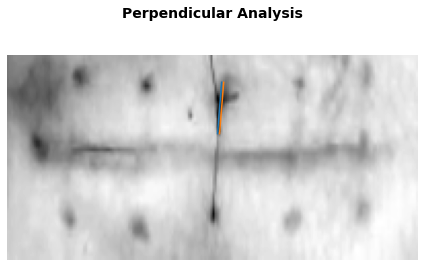

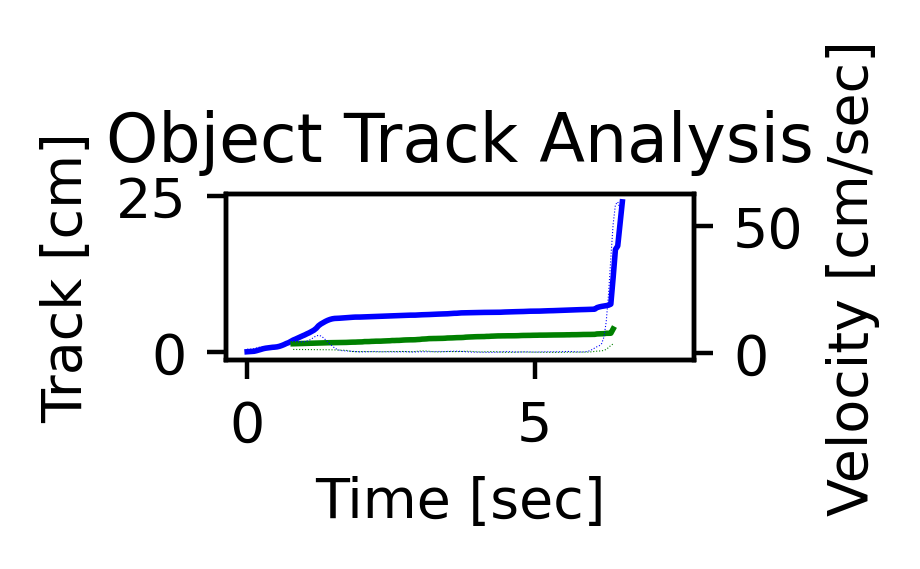

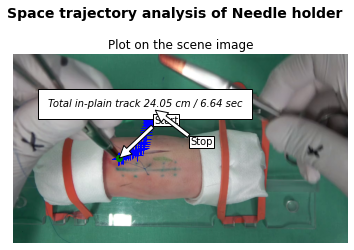

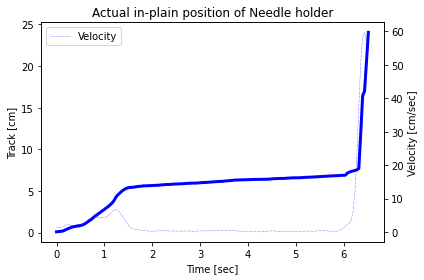

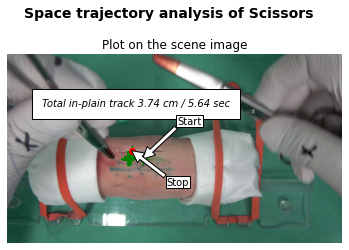

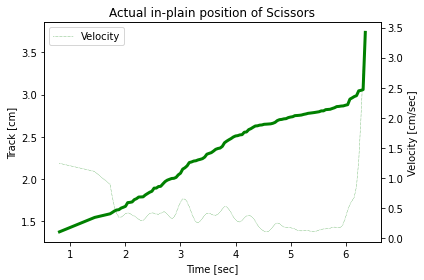

In [29]:
pigleg_cv.do_computer_vision(img_pths[0],  "./del_test_video_output/", meta=None)

2023-06-27 14:48:14.791 | DEBUG    | run_report:main_report:550 - Sort data N=
2023-06-27 14:48:14.797 | DEBUG    | run_report:main_report:595 - [960, 540], [1110, 312]
2023-06-27 14:48:14.846 | DEBUG    | run_report:create_video_report:426 - main_video_report: OK
2023-06-27 14:48:14.853 | DEBUG    | run_report:main_report:618 - Frame 0 processed!


b Needle holder
g Scissors


2023-06-27 14:48:15.745 | DEBUG    | run_report:main_report:618 - Frame 10 processed!
2023-06-27 14:48:16.631 | DEBUG    | run_report:main_report:618 - Frame 20 processed!
2023-06-27 14:48:17.515 | DEBUG    | run_report:main_report:618 - Frame 30 processed!
2023-06-27 14:48:18.402 | DEBUG    | run_report:main_report:618 - Frame 40 processed!
2023-06-27 14:48:19.288 | DEBUG    | run_report:main_report:618 - Frame 50 processed!
2023-06-27 14:48:20.175 | DEBUG    | run_report:main_report:618 - Frame 60 processed!
2023-06-27 14:48:21.062 | DEBUG    | run_report:main_report:618 - Frame 70 processed!
2023-06-27 14:48:21.947 | DEBUG    | run_report:main_report:618 - Frame 80 processed!
2023-06-27 14:48:22.823 | DEBUG    | run_report:main_report:618 - Frame 90 processed!
2023-06-27 14:48:23.697 | DEBUG    | run_report:main_report:618 - Frame 100 processed!
2023-06-27 14:48:24.578 | DEBUG    | run_report:main_report:618 - Frame 110 processed!
2023-06-27 14:48:25.456 | DEBUG    | run_report:main

main_report: Video file ../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4 is processed!


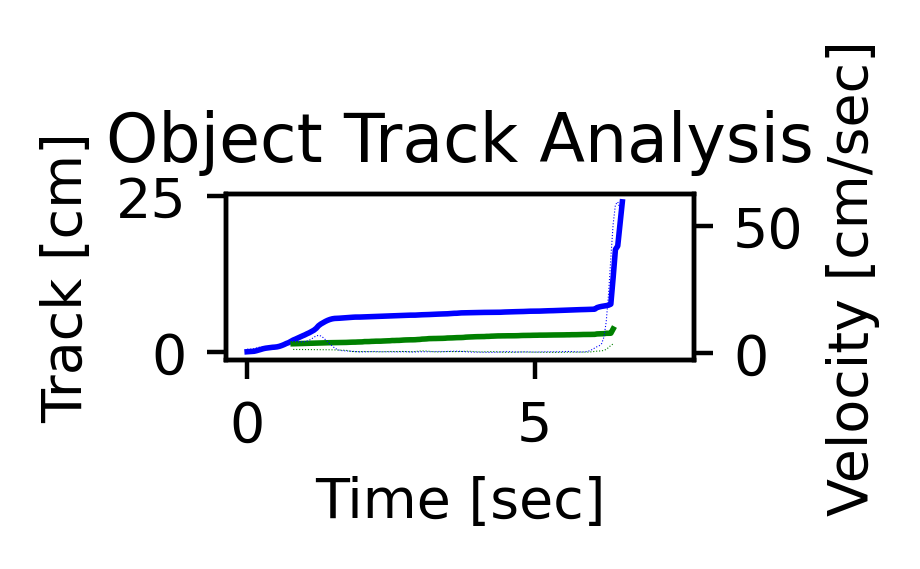

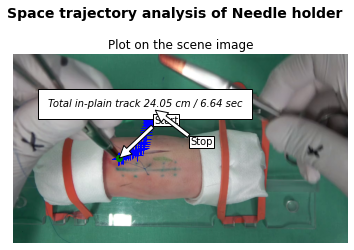

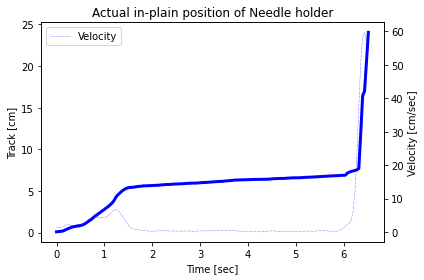

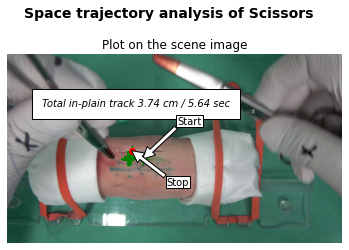

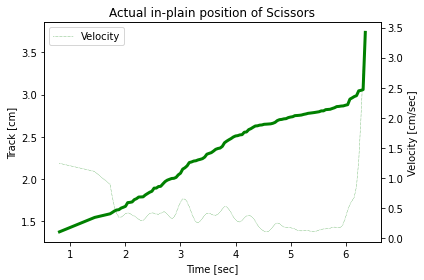

In [30]:

# pigleg_cv.do_computer_vision(img_pths[0],  "./del_test_video_output/", meta=None)
pigleg_cv.main_report(str(img_pths[0]),  "./del_test_video_output/")

In [31]:
img_pths[0]

PosixPath('../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4')

In [32]:
!python /home/appuser/mmdetection/mmdet/utils/collect_env.py

fatal: detected dubious ownership in repository at '/webapps/piglegsurgery'
To add an exception for this directory, call:

	git config --global --add safe.directory /webapps/piglegsurgery
sys.platform: linux
Python: 3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:04:10) [GCC 10.3.0]
CUDA available: True
GPU 0: NVIDIA GeForce GTX 1080 Ti
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.7, V11.7.64
GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
PyTorch: 1.12.0a0+8a1a93a
PyTorch compiling details: PyTorch built with:
  - GCC 9.4
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.5.2 (Git Hash N/A)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_52,code=sm_52;-gencode;arch=compute_60,cod

In [33]:
!pwd

/webapps/piglegsurgery/piglegcv


In [34]:
pip list

Package                       Version                  Editable project location
----------------------------- ------------------------ -------------------------
absl-py                       1.0.0
addict                        2.4.0
alabaster                     0.7.12
albumentations                1.3.1
apex                          0.1
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.0.5
async-timeout                 4.0.2
asynctest                     0.13.0
attributee                    0.1.5
attrs                         21.4.0
audioread                     2.1.9
Babel                         2.10.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.11.1
bleach                        5.0.0
blis                          0.7.7
brotlipy                      0.7.0
cachetools                    5.0.0
catalogue                     2.0.6
certi

In [35]:
# !MMCV_WITH_OPS=1 FORCE_CUDA=1 pip install mmcv-full==1.5.2

In [36]:
# !pip uninstall -y mmcv-full